In [2]:
import pandas as pd
import json
import numpy as np
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm

In [3]:
df = pd.read_csv('../data/turbine_loc_test.csv', sep=',', dtype = np.float32)
turb_coords = df.to_numpy(dtype = np.float32)
turb_coords.shape

(50, 2)

In [4]:
powerCurve = pd.read_csv('../data/power_curve.csv', sep=',', dtype = np.float32)
powerCurve = powerCurve.to_numpy(dtype = np.float32)
powerCurve.shape

(501, 3)

In [17]:
def wind_rose(wr):
    wd = wr[:,0]
    ws = wr[:,1]
    ax = WindroseAxes.from_ax()
    ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white')
    ax.set_legend()

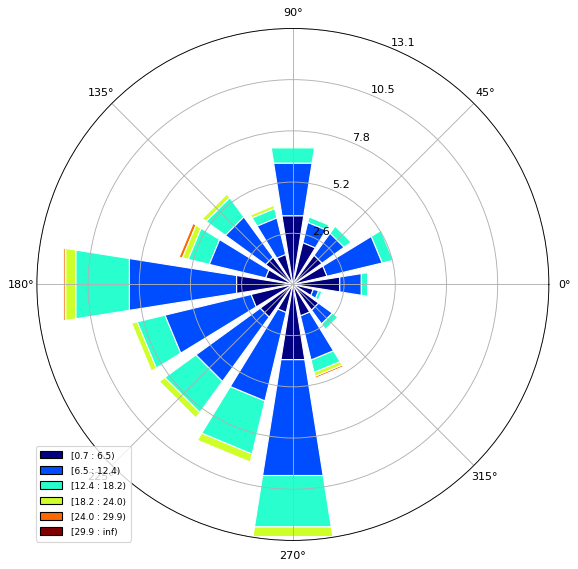

In [18]:
df = pd.read_csv('../data/WindData/wind_data_2007.csv')
wind_resource = df[['drct', 'sped']].to_numpy(dtype = np.float32)
wind_rose(wind_resource)

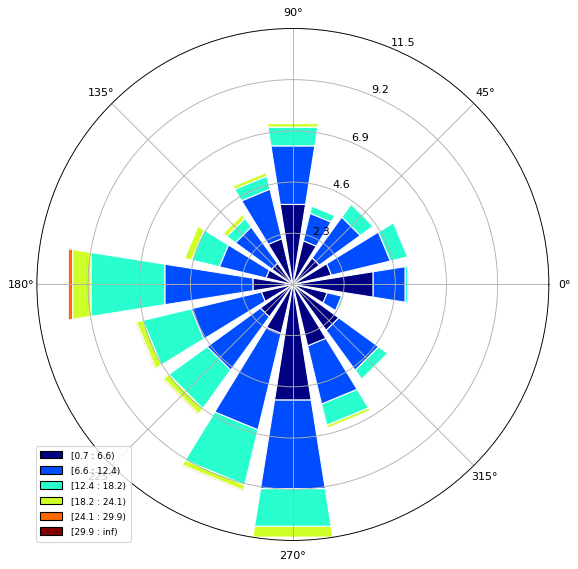

In [19]:
df = pd.read_csv('../data/WindData/wind_data_2008.csv')
wind_resource = df[['drct', 'sped']].to_numpy(dtype = np.float32)
wind_rose(wind_resource)

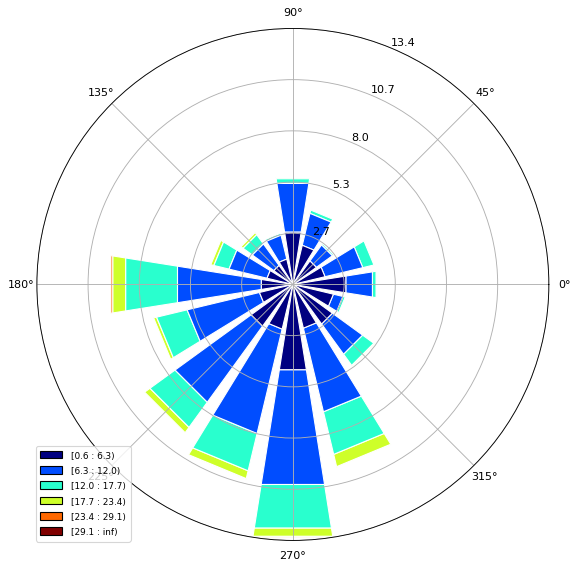

In [20]:
df = pd.read_csv('../data/WindData/wind_data_2009.csv')
wind_resource = df[['drct', 'sped']].to_numpy(dtype = np.float32)
wind_rose(wind_resource)

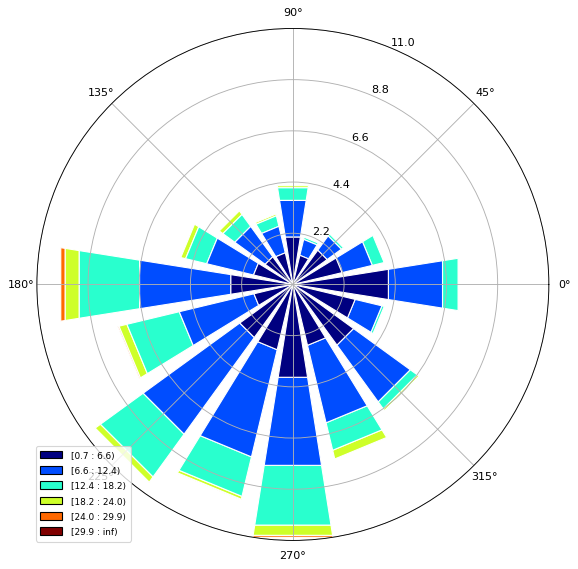

In [21]:
df = pd.read_csv('../data/WindData/wind_data_2013.csv')
wind_resource = df[['drct', 'sped']].to_numpy(dtype = np.float32)
wind_rose(wind_resource)

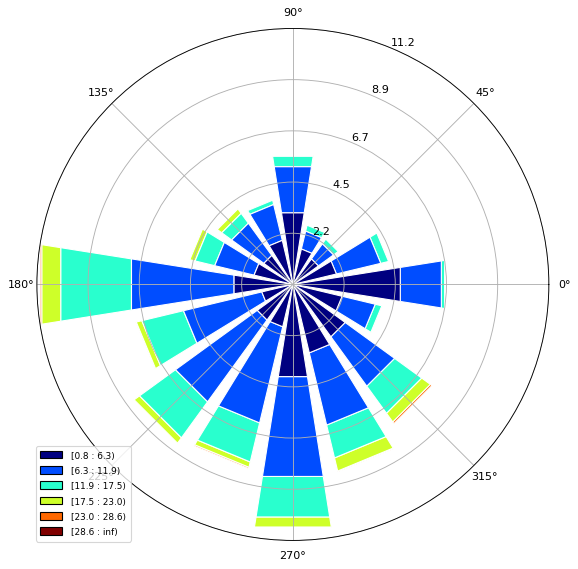

In [22]:
df = pd.read_csv('../data/WindData/wind_data_2014.csv')
wind_resource = df[['drct', 'sped']].to_numpy(dtype = np.float32)
wind_rose(wind_resource)

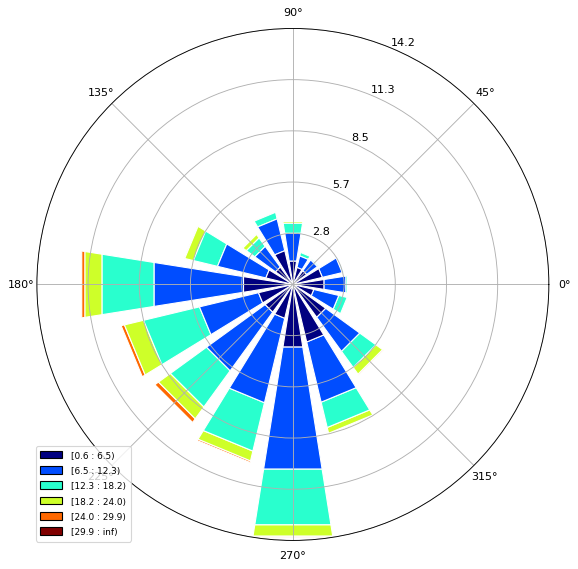

In [23]:
df = pd.read_csv('../data/WindData/wind_data_2015.csv')
wind_resource = df[['drct', 'sped']].to_numpy(dtype = np.float32)
wind_rose(wind_resource)

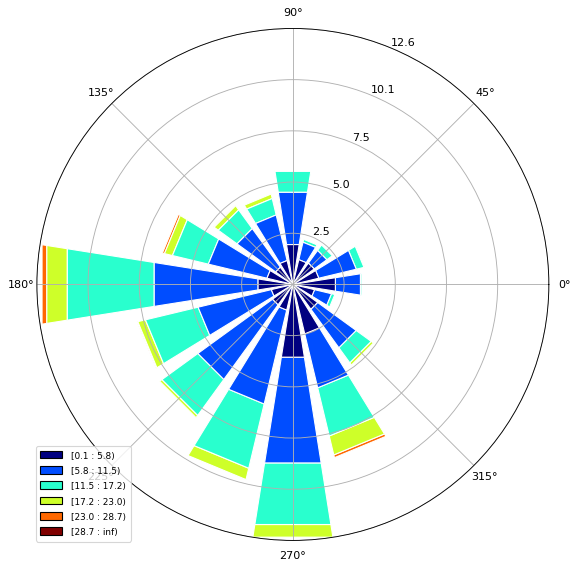

In [24]:
df = pd.read_csv('../data/WindData/wind_data_2017.csv')
wind_resource = df[['drct', 'sped']].to_numpy(dtype = np.float32)
wind_rose(wind_resource)

In [6]:
# direction 'slices' in degrees
slices_drct   = np.roll(np.arange(10, 361, 10, dtype=np.float32), 1)
## slices_drct   = [360, 10.0, 20.0.......340, 350]
n_slices_drct = slices_drct.shape[0]

# speed 'slices'
slices_sped   = [0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 
                    18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0]
n_slices_sped = len(slices_sped)-1


# placeholder for binned wind
binned_wind = np.zeros((n_slices_drct, n_slices_sped), 
                       dtype = np.float32)

# 'trap' data points inside the bins. 
for i in range(n_slices_drct):
    for j in range(n_slices_sped):     

        # because we already have drct in the multiples of 10
        foo = wind_resource[(wind_resource[:,0] == slices_drct[i])] 

        foo = foo[(foo[:,1] >= slices_sped[j]) 
                      & (foo[:,1] <  slices_sped[j+1])]

        binned_wind[i,j] = foo.shape[0]  

wind_inst_freq = binned_wind/np.sum(binned_wind)
wind_inst_freq = wind_inst_freq.ravel()
wind_inst_freq.shape

(540,)